In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Desafío hacer web scrapping a otro año
Se optará por crear el web scraping con algo que se vio en teoría en las clases, que sería con un for recorrer varios años, en este caso se utilizará la última década

In [3]:
# Se define la URL donde se agregará el valor de cada año
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'
# Se crea un df vacío que irá almacenando el resultado de todos los años
df_general = pd.DataFrame()

# Recorrido de la última década, como queremos recorrer hasta el 2023, en el método range() debemos indicar 2024 por los índices de python
for year in range(2012, 2024):
    url = url_link.format(year)
    df = pd.read_html(url, header=0)
    df_year = df[0]
    df_year['Year'] = year
    df_general = pd.concat([df_general, df_year], ignore_index=True)
# Limpieza de datos
df_general = df_general[df_general["Rk"] != "Rk"]

# 2 Desafío (opcional) hacer un análisis del mismo
Se realizará una exploración del dataset y se mostrarán algunas estadísticas con gráficos o tablas

In [4]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 8016
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      7717 non-null   object
 1   Player  7717 non-null   object
 2   Pos     7717 non-null   object
 3   Age     7717 non-null   object
 4   Tm      7717 non-null   object
 5   G       7717 non-null   object
 6   GS      7717 non-null   object
 7   MP      7717 non-null   object
 8   FG      7717 non-null   object
 9   FGA     7717 non-null   object
 10  FG%     7666 non-null   object
 11  3P      7717 non-null   object
 12  3PA     7717 non-null   object
 13  3P%     6960 non-null   object
 14  2P      7717 non-null   object
 15  2PA     7717 non-null   object
 16  2P%     7605 non-null   object
 17  eFG%    7666 non-null   object
 18  FT      7717 non-null   object
 19  FTA     7717 non-null   object
 20  FT%     7250 non-null   object
 21  ORB     7717 non-null   object
 22  DRB     7717 non-null   

In [5]:
df_general.isnull().sum()

Rk          0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        51
3P          0
3PA         0
3P%       757
2P          0
2PA         0
2P%       112
eFG%       51
FT          0
FTA         0
FT%       467
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Year        0
dtype: int64

Al hacer la primera aproximación de los datos, hay varias terminologías que se desconocen, lo siguiente es el glosario
- Rk -- Rank
- Pos -- Position
- Age -- Player's age on February 1 of the season
- Tm -- Team
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage

*This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.*
- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game

In [6]:
# Lo primero a analizar será la edad de los jugadores con base en las posiciones
# Lo primero el tipo de dato de la columna 'Age' se cambiará a int
df_general['Age'] = df_general['Age'].astype(int)
# Se realizará una agrupación de la posición y se utilizará el método agg para poder mostrar la edad mínima, edad máxima, promedio y mediana
age_info = df_general.groupby('Pos')['Age'].agg(['min', 'max', 'mean', 'median'])
age_info['mean'] = age_info['mean'].astype(int)
age_info['median'] = age_info['median'].astype(int)
age_info

,min,max,mean,median
Pos,,,,
C,19,42,26,26
C-PF,21,32,26,26
PF,19,43,26,26
PF-C,22,33,26,25
PF-SF,22,31,26,26
PG,19,39,26,26
PG-SG,22,31,25,25
SF,19,41,26,26
SF-C,33,33,33,33


A simple vista, se puede apreciar que tanto la edad media y mediana es frecuente ver los 26 años, además, que la edad que probablemente se retiren sea cercano a los 40 ya que la edad máxima entre todos los datos es solo un poco más de eso.
Ahora bien, el resultado puede estar sesgado por la misma agrupación de datos ya que, honestamente, solo deberían ser unas 6 posiciones distintas, pero el en dataset original ya agrupa a los jugadores que jugaron en posiciones distintas, pero no en filas distintas, sino que en la misma, por lo tanto, en cuanto al análisis (a menos que se corrija de alguna manera el dataset original) la columna posición es poco probable que sirva.

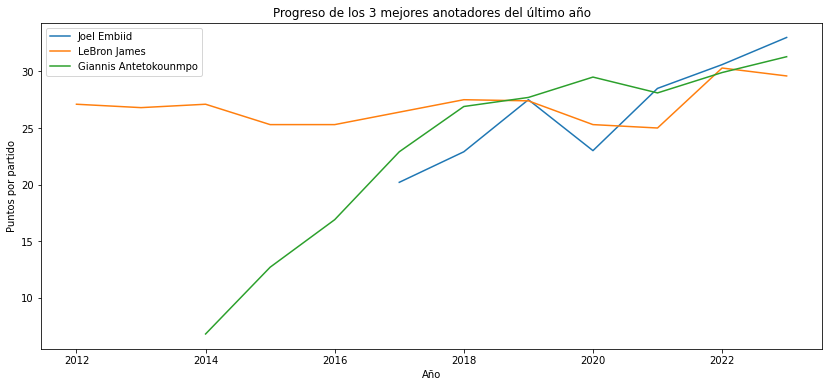

In [11]:
# El siguiente análisis es para comparar la evoluciones de los mejores anotadores del último año completo

# El primer paso es obtener los mejores anotadores del último año completo

# Convertir la columna "PTS" a un tipo de datos float
df_general['PTS'] = df_general['PTS'].astype(float)
# Crea un df donde filtra solo el año 2022 y luego se agrupan en la media de puntos por jugador, ordena para obtener los mayores y se extraen los mejores 3
last_year = 2022 # Para que sea dinámico esto también se puede obtener con el método max() aplicado a la columna "Year", sin embargo para este análisis se indicará manual el año
last_year_df = df_general[df_general['Year'] == last_year]
player_points = last_year_df.groupby('Player')['PTS'].mean().sort_values(ascending=False)
best_players = player_points.index[:3]

# Para crear el gráfico se debe considerar que, de alguna manera, hay que hacer un gráfico de puntos para cada jugador, no obstante, para crearlo en solo un gráfico se recorrerá el índice creado en el punto anterior
fig, ax = plt.subplots(figsize=(14,6))
# Se recorrerá el  indice creado anteriormente con un for, por cada jugador se creará un plot con el avance de los puntos de cada uno a través de los años, para esto se tiene que usar el df principal y se filtrará por cada jugador
for player in best_players:
    player_df = df_general[df_general['Player'] == player]
    ax.plot(player_df['Year'], player_df['PTS'], label=player)

ax.legend()
ax.set_xlabel('Año')
ax.set_ylabel('Puntos por partido')
ax.set_title('Progreso de los 3 mejores anotadores del último año')
plt.show()

**Conclusiones**:
- El mejor anotador del 2022 (Joel Embiid) es el que menos tiempo ha jugado en la NBA
- El segundo mejor anotador (Giannis Antetokounmpo) de ellos ha tenido un progreso muy marcado desde que empezó
- El tercer mejor anotador (Lebron James) ha sido muy constante a lo largo de los años ya que no tiene peaks tan marcados

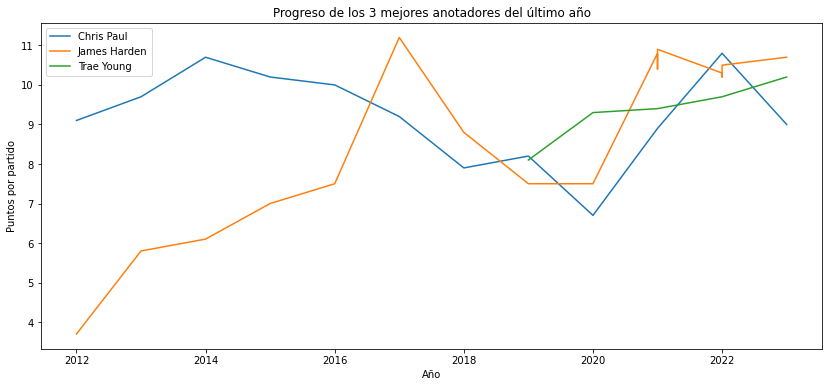

In [12]:
# El siguiente análisis es para comparar la evoluciones de los mejores asistidores del último año completo, por lo tanto se utilizará el mismo flujo del gráfico anterior pero la variable será distinta

# El primer paso es obtener los mejores asistidores del último año completo
df_general['AST'] = df_general['AST'].astype(float)
last_year = 2022
last_year_df = df_general[df_general['Year'] == last_year]
player_points = last_year_df.groupby('Player')['AST'].mean().sort_values(ascending=False)
best_players = player_points.index[:3]

fig, ax = plt.subplots(figsize=(14,6))
for player in best_players:
    player_df = df_general[df_general['Player'] == player]
    ax.plot(player_df['Year'], player_df['AST'], label=player)

ax.legend()
ax.set_xlabel('Año')
ax.set_ylabel('Puntos por partido')
ax.set_title('Progreso de los 3 mejores anotadores del último año')
plt.show()

Se puede apreciar claramente que esta comparativa es bastante menos regular, por lo tanto no se pueden sacar las mejores conclusiones y es probable que no se puede utilizar en algún modelo de machine learning